# Bharat Intern Machine Learning Internship (May 2023)

# Task 3: Iris Flower Classification

# Name : Manoj Patil


Objective - 

Predict the different species of flowers on
the length of there petals and sepals
only Jupyter notebook code.

In [1]:
# Importing Required Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm
from warnings import filterwarnings
filterwarnings(action='ignore')




In [2]:
data=pd.read_csv('bharat-Iriscsv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Cleaning

In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
data = data.drop(['Id'], axis = 1) # Not Required so dropping it 

In [12]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
data.duplicated().sum()

3

In [14]:
data.drop_duplicates(keep = 'first', inplace = True) # Removed duplicates

In [15]:
data.duplicated().sum() # No duplicates

0

In [16]:
data.isnull().sum() # No null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualization

In [17]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

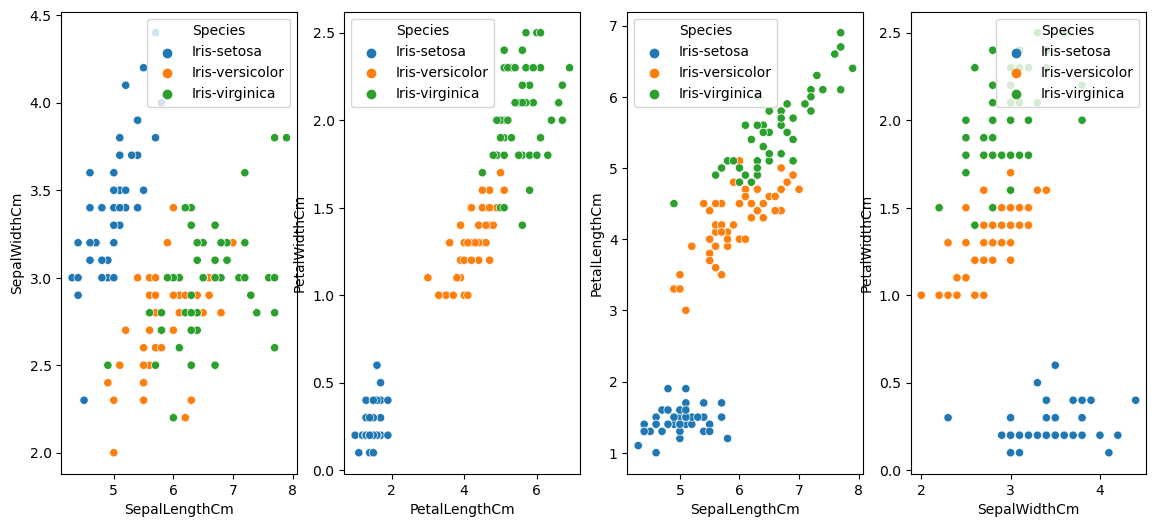

In [18]:
# Scatter Plot for data Visualization

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(14,6))
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", hue = 'Species', data = data, ax = ax1)
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", hue = 'Species', data = data, ax = ax2)
sns.scatterplot(x = "SepalLengthCm", y = "PetalLengthCm", hue = 'Species', data = data, ax = ax3)
sns.scatterplot(x = "SepalWidthCm", y = "PetalWidthCm", hue = 'Species', data = data, ax = ax4)

<AxesSubplot:>

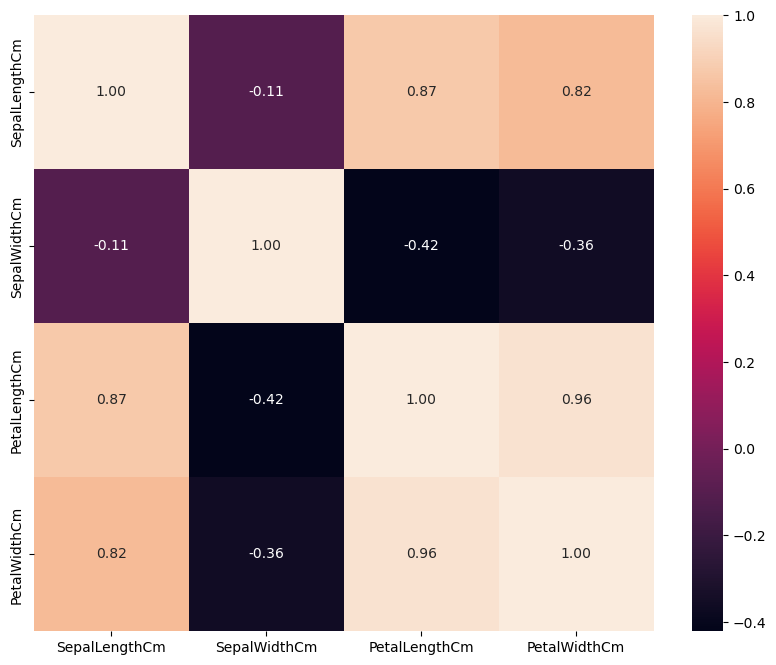

In [19]:
# Checking corr with help of heat map 

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, fmt = '.2f')

# Label Encoding 

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
data['Species'] = le.fit_transform(data['Species'])

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting data into Label and Features (X & Y)

In [23]:
x = data.drop(['Species'], axis = 1)
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y = data['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

# Splitting the dataset into training and Testing

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
134,6.1,2.6,5.6,1.4
109,7.2,3.6,6.1,2.5
61,5.9,3.0,4.2,1.5
112,6.8,3.0,5.5,2.1
...,...,...,...,...
9,4.9,3.1,1.5,0.1
105,7.6,3.0,6.6,2.1
69,5.6,2.5,3.9,1.1
119,6.0,2.2,5.0,1.5


In [27]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
7,5.0,3.4,1.5,0.2
24,4.8,3.4,1.9,0.2
27,5.2,3.5,1.5,0.2
122,7.7,2.8,6.7,2.0
146,6.3,2.5,5.0,1.9
53,5.5,2.3,4.0,1.3
45,4.8,3.0,1.4,0.3
22,4.6,3.6,1.0,0.2
114,5.8,2.8,5.1,2.4
26,5.0,3.4,1.6,0.4


In [28]:
y_train

10     0
134    2
109    2
61     1
112    2
      ..
9      0
105    2
69     1
119    2
49     0
Name: Species, Length: 110, dtype: int32

In [29]:
y_test

7      0
24     0
27     0
122    2
146    2
53     1
45     0
22     0
114    2
26     0
42     0
80     1
133    2
64     1
73     1
93     1
16     0
56     1
100    2
8      0
91     1
39     0
148    2
86     1
120    2
33     0
147    2
92     1
85     1
107    2
78     1
18     0
47     0
52     1
46     0
2      0
65     1
Name: Species, dtype: int32

# Train the Algorithm

# Model 1 : Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

# Predecting the test data set(x_test)

In [32]:
y_pred=dtc_model.predict(x_test) 

In [33]:
y_pred# model predicted

array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1])

In [34]:
y_test # Actual

7      0
24     0
27     0
122    2
146    2
53     1
45     0
22     0
114    2
26     0
42     0
80     1
133    2
64     1
73     1
93     1
16     0
56     1
100    2
8      0
91     1
39     0
148    2
86     1
120    2
33     0
147    2
92     1
85     1
107    2
78     1
18     0
47     0
52     1
46     0
2      0
65     1
Name: Species, dtype: int32

# Evaluating the Performance of Model

In [35]:
#Accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100


97.2972972972973

In [36]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics


In [37]:
train, test = train_test_split(data, test_size = 0.25)
print(train.shape)
print(test.shape)

(110, 5)
(37, 5)


In [38]:
x_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train= train.Species

x_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

In [39]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
136,6.3,3.4,5.6,2.4
39,5.1,3.4,1.5,0.2
78,6.0,2.9,4.5,1.5
111,6.4,2.7,5.3,1.9
85,6.0,3.4,4.5,1.6
...,...,...,...,...
143,6.8,3.2,5.9,2.3
95,5.7,3.0,4.2,1.2
54,6.5,2.8,4.6,1.5
115,6.4,3.2,5.3,2.3


In [40]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
98,5.1,2.5,3.0,1.1
133,6.3,2.8,5.1,1.5
83,6.0,2.7,5.1,1.6
66,5.6,3.0,4.5,1.5
17,5.1,3.5,1.4,0.3
27,5.2,3.5,1.5,0.2
146,6.3,2.5,5.0,1.9
101,5.8,2.7,5.1,1.9
6,4.6,3.4,1.4,0.3
72,6.3,2.5,4.9,1.5


In [41]:
y_train

136    2
39     0
78     1
111    2
85     1
      ..
143    2
95     1
54     1
115    2
89     1
Name: Species, Length: 110, dtype: int32

In [42]:
y_test

98     1
133    2
83     1
66     1
17     0
27     0
146    2
101    2
6      0
72     1
123    2
103    2
148    2
51     1
47     0
25     0
9      0
73     1
130    2
126    2
134    2
108    2
118    2
90     1
59     1
15     0
26     0
96     1
82     1
41     0
42     0
29     0
52     1
110    2
132    2
2      0
86     1
Name: Species, dtype: int32

# Using Logistic Regression

In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 0.972972972972973


Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test,prediction))

Confusion matrix: 
 [[12  0  0]
 [ 0 11  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        12
           2       0.93      1.00      0.96        13

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



# Using KNN Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.972972972972973


# Using GaussianNB

In [46]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.9459459459459459
